In [237]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

#### Задание 1

In [217]:
def matrix_generate(rows, columns, type_ = "full", eps = 0, rank = None):
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric", "diagonal", "lower_triangular", "singular", "stepped", "disturbed"
    eps: float, optional0
        Дополнительное число, использующееся при генерации для некоторых типов матриц.
    rank: int
        Ранг создаваемой матрицы

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","upper_triangular",
        "symmetric", "diagonal", 
        "lower_triangular", "singular", 
        "stepped", "disturbed"
        ...


    """
    A = None

    if type_ == "full":

        A = np.random.random(size=(rows, columns))

    elif type_ == "upper_triangular":

            A = np.triu(np.random.random(size=(rows, columns)))

    elif type_ == "lower_triangular":
            
            A = np.tril(np.random.random(size=(rows, columns)))
        
    elif type_ == "diagonal":
        
        if rows != columns:
            raise TypeError( f"Error with type {type_} and shape ({rows},{columns})")
        
        else: 
            A = np.diag(np.random.random(size = rows))

    elif type_ == "symmetric":

        if rows != columns:
            raise TypeError( f"Error with type {type_} and shape ({rows},{columns})")

        else:
            A = np.triu(np.random.random(size=(rows, columns)))
            A += (A.T - np.diag(np.diag(A)))
            
    elif type_ == "singular":
         
         A = np.random.random(size = (rows, columns))
         A[-1, :] = 0


    elif type_ == "stepped":

        if not rank:
            return 1
        
        elif rank > rows or rank > columns or rows != columns:
            raise TypeError(f"Error with type {type_}, shape ({rows},{columns}) and rank {rank}")
    
        else:
            A = np.triu(np.random.random(size=(rows,columns)))
            if rank < rows:
                A[rows-rank:, :] = 0
                

    elif type_ == "disturbed":
         
        A = eps * (2 * np.random.random(size=(rows,columns)) - 1)
    
    else:
         
         raise ValueError(f'No such type {type_}')

    return A

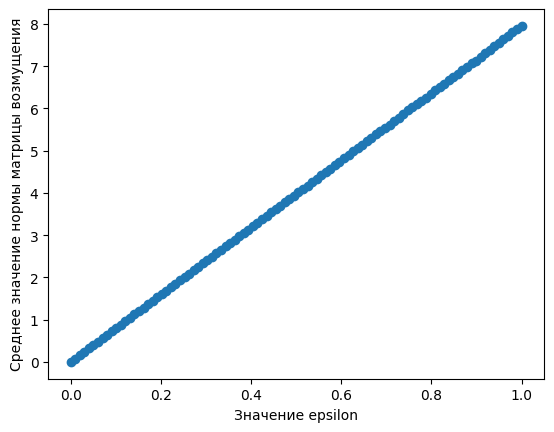

In [177]:
N = 1000 # sampling points
eps = np.linspace(1e-8, 1, 100)
size = (19, 10)
average_norms = []
np.random.seed(42)

for e in eps:
    norms = []
    for _ in range(N):
        M = matrix_generate(size[0], size[1], "disturbed", e)
        norm = np.linalg.norm(M, ord="fro") # frobenius norm
        norms.append(norm)
    average_norms.append(np.mean(norms))

plt.scatter(eps, average_norms)
plt.xlabel('Значение epsilon')
plt.ylabel('Среднее значение нормы матрицы возмущения')
plt.show()

In [211]:
N = 1000 # sampling points
np.random.seed(42)
type_ = 'upper_triangular'
size = (4,4)

matrices = list(matrix_generate(size[0], size[1], type_, rank=3) for _ in range(N)) 
svals = np.array(list(np.linalg.svdvals(m) for m in matrices))
min_svals = np.array(list(np.min(v) for v in svals))
num_nonzero = np.count_nonzero(min_svals)
probability = (N - np.count_nonzero(min_svals)) / N

print(f'Probabilty of random {type_} matrix {size[0]}x{size[1]} being singular is: {probability}')

Probabilty of random upper_triangular matrix 4x4 being singular is: 0.0


#### Задание 2 

In [ ]:
def norm(x, ord=1):
    if not (x.any()):
        return 0
    else: 
        x = np.array(x)
        dim = x.ndim

    if ord == 1:

        if dim == 1:
            return sum(np.abs(x))
        
        elif dim == 2:
            x = np.abs(x)
            col_sum = np.sum(x, axis=1)
            return max(col_sum)
        
    elif ord == 2:

        if dim == 1: 
            return np.sqrt(sum(x**2))
        
        if dim == 2:
            M = np.dot(x.T, x)
            eig = eigvals(M)
            return np.real(np.sqrt(max(eig)))
        
    elif ord == 'inf':

        if dim == 1:
            return (max(np.abs(x)))
        
        elif dim == 2:
            x = np.abs(x)
            rows_sum = np.sum(x, axis=0)
            return max(rows_sum)
# можно пж не писать документацию(((((

#### Задание 3

Найдите константы $C_1$ и $C_2$ такие, что

$C_1||x||_2 \leq ||x||_1 \leq C_2||x||_2$

$\boxed{C_2 = \sqrt{n}}$

$\textbf{Доказательство:}$
Применяем неравенство КБШ:
$$
\left( \sum_{i=1}^n |x_i| \right)^2 \leq \left( \sum_{i=1}^n 1^2 \right) \left( \sum_{i=1}^n |x_i|^2 \right) = n \cdot \|x\|_2^2.
$$
Извлекая квадратный корень:
$
\|x\|_1 \leq \sqrt{n} \cdot \|x\|_2.
$

Константа $\sqrt{n}$ оптимальна, так как для $x = (1, 1, \dots, 1)$ достигается равенство.

$\boxed{C_1 = 1}$

$\textbf{Доказательство:}$
$$
\|x\|_1^2 = \left( \sum_{i=1}^n |x_i| \right) ^2 \geq \sum_{i=1}^n |x_i|^2 = \|x\|_2^2
$$
поскольку квадрат суммы не меньше суммы квадратов

Для вектора $x = (1, 0, \dots, 0)$ выполняется
$
\|x\|_1 = 1 = \|x\|_2,
$

#### Задание 4 

$\boxed{\|x\|_2 \leq \sqrt{m} \cdot \|x\|_\infty}$

$\textbf{Доказательство:}$
Пусть $x = (x_1, x_2, \dots, x_m)$. Тогда для каждого i выполняется $|x_i| \leq \|x\|_\infty$, поэтому
$$
\sum_{i=1}^m |x_i|^2 \leq m \cdot (\|x\|_\infty)^2.
$$
Извлекая квадратный корень, получаем требуемое.

$\textbf{Пример равенства:}$ $x = (1, 1, \dots, 1)$.

$\boxed{\|A\|_\infty \leq \sqrt{n} \cdot \|A\|_2}$

$\textbf{Доказательство:}$
Заметим, что $\|A\|_\infty = \max_{1 \leq i \leq m} \|e_i^T A\|_1$. Для любого вектора v длины n верно $\|v\|_1 \leq \sqrt{n} \cdot \|v\|_2$, поэтому
$$
\|e_i^T A\|_1 \leq \sqrt{n} \cdot \|e_i^T A\|_2 \leq \sqrt{n} \cdot \|A\|_2.
$$
Взяв максимум по i, получаем неравенство.

$\textbf{Пример равенства:}$ Матрица-строка из единиц $A = \begin{pmatrix} 1 & 1 & \dots & 1 \end{pmatrix}$.